# ai_library
CNN for classification of custom generated image data
### Imports and jupyter TensorBoard extension

In [1]:
# load TensorBoard
%load_ext tensorboard
# imports
import datetime
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping

from CustomData import CustomData
from NeuralNet import NeuralNet
from Visualisation import Visualisation


### Parameters for CNN fit

In [2]:
# parameters
EPOCHS = 30
BATCH_SIZE = 128


### Generate train and test data using the CustomData class
*generate_data* generates an array containing a specified number of images showing random shapes and a list containing the corresponding labels

In [3]:
# generate custom data
data_gen = CustomData()

x_train, y_train = data_gen.generate_data(n=15000)
x_test, y_test = data_gen.generate_data(n=3000)

### Let's take a look at the generated data
The shapes are: line, circle, rectangle, triangle and chair

rerun the code below to see a different sample

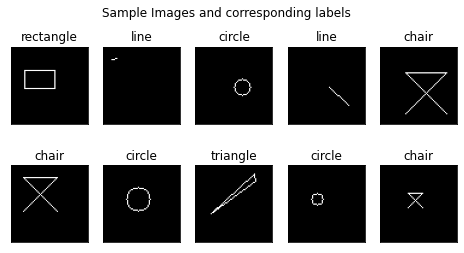

In [4]:
# show images
viz = Visualisation()
viz.img_plot("Sample Images and corresponding labels", x_train, y_train)

### Preprocess data to feed into the model and store input shape and number of classes for classification
*preprocessing* reshapes the array, normalizes pixel values and turns string labels to integers

In [5]:
# preprocessing
x_train, y_train, labels_train = data_gen.preprocessing(x_train, y_train)
x_test, y_test, labels_test = data_gen.preprocessing(x_test, y_test)

# input shape and number of classes
inp_shape = x_train.shape
num_classes = len(labels_train)

### Initialize model and set callbacks

In [6]:
# initialize model
model = NeuralNet(num_classes)

# callbacks
# early stopping
early_stopping = EarlyStopping(monitor="val_loss", mode="min", patience=2)
# tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_cb = TensorBoard(log_dir=log_dir, histogram_freq=1)

callbacks = [early_stopping, tensorboard_cb]

### Train the model

In [7]:
# train model
history = model.comp_and_fit(x_train, y_train, EPOCHS, BATCH_SIZE, callbacks)

Epoch 1/30
94/94 - 54s - loss: 0.3563 - accuracy: 0.8553 - val_loss: 0.0775 - val_accuracy: 0.9797
Epoch 2/30
94/94 - 51s - loss: 0.0657 - accuracy: 0.9787 - val_loss: 0.0316 - val_accuracy: 0.9913
Epoch 3/30
94/94 - 49s - loss: 0.0271 - accuracy: 0.9934 - val_loss: 0.0191 - val_accuracy: 0.9957
Epoch 4/30
94/94 - 48s - loss: 0.0193 - accuracy: 0.9954 - val_loss: 0.0287 - val_accuracy: 0.9927
Epoch 5/30
94/94 - 49s - loss: 0.0178 - accuracy: 0.9958 - val_loss: 0.0148 - val_accuracy: 0.9970
Epoch 6/30
94/94 - 48s - loss: 0.0126 - accuracy: 0.9970 - val_loss: 0.0254 - val_accuracy: 0.9923
Epoch 7/30
94/94 - 46s - loss: 0.0274 - accuracy: 0.9915 - val_loss: 0.0165 - val_accuracy: 0.9963


### Let's take a look at the loss and accuracy curves in TensorBoard

In [8]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 7216), started 0:35:15 ago. (Use '!kill 7216' to kill it.)

The learning curves show no signs of under or overfitting. Accuracy increases and loss decreases over epochs for training and validation sets and there is only a small gap between the curves at the end of training.

### Evaluate the model on the test data

In [9]:
# model evaluation
loss, accuracy = model.test_eval(x_test, y_test)
print("Accuracy:", round(accuracy * 100, 2), "%")

Accuracy: 99.5 %


The model is able to accurately predict on the test data

A look at the confusion matrix provides more info on errors: Apparently the model sometimes confuses triangles and lines

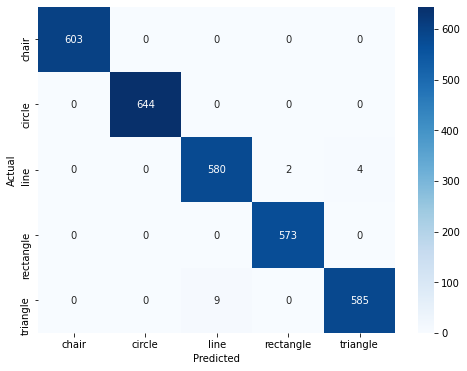

In [10]:
# predictions
y_preds = model.test_pred(x_test)
# confusion matrix
viz.cm_plot(y_test, y_preds, labels_test)

#### Run the code below to see random image samples and the predicted labels

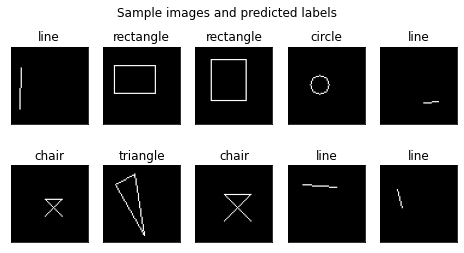

In [11]:
# plot sample
viz.img_plot("Sample images and predicted labels", x_test, labels_test[y_preds])